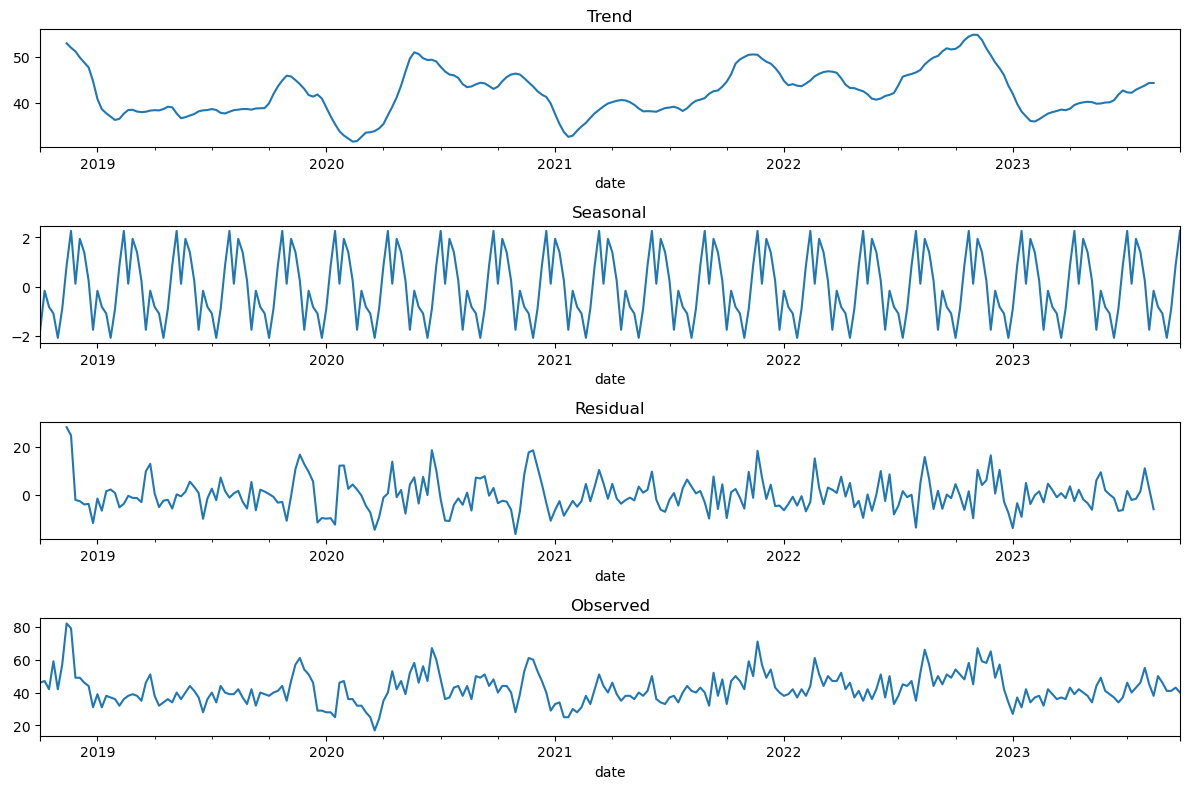

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['GAP Inc', 'GAP clothing', 'GAP online shopping', 'GAP fashion', 'GAP stores']
pytrend.build_payload(kw_list=keywords, timeframe='today 5-y', geo='US')

interest_over_time_df = pytrend.interest_over_time()

# Make sure to convert the date index to a datetime object
interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(interest_over_time_df['GAP clothing'], model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonal')
decomposition.resid.plot(ax=ax3, title='Residual')
decomposition.observed.plot(ax=ax4, title='Observed')
plt.tight_layout()
plt.show()

In [2]:
interest_over_time_df

,GAP Inc,GAP clothing,GAP online shopping,GAP fashion,GAP stores,isPartial
date,,,,,,
2018-10-07,38,46,4,12,45,False
2018-10-14,42,47,5,10,37,False
2018-10-21,36,42,0,18,44,False
2018-10-28,46,59,2,7,45,False
2018-11-04,38,42,10,15,43,False
...,...,...,...,...,...,...
2023-08-27,30,46,1,10,20,False
2023-09-03,34,41,1,8,33,False
2023-09-10,31,41,3,10,29,False


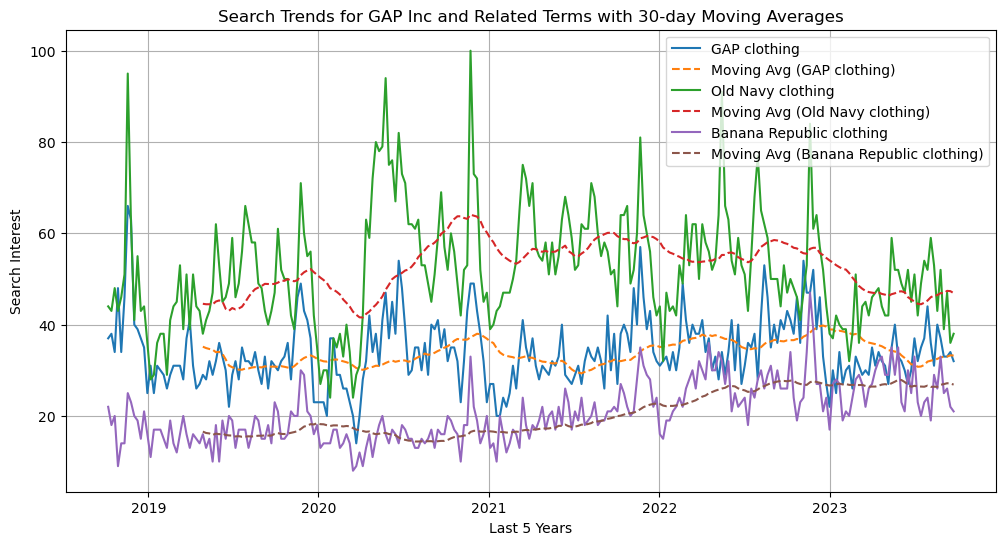

In [4]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np

pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['GAP clothing', 'Old Navy clothing', 'Banana Republic clothing']
pytrend.build_payload(kw_list=keywords, timeframe='today 5-y', geo='US')

interest_over_time_df = pytrend.interest_over_time()

# Calculate the moving averages for each search term
window_size = 30  # Adjust the window size as needed for the desired smoothing
moving_averages = {}
for keyword in keywords:
    moving_averages[keyword] = interest_over_time_df[keyword].rolling(window=window_size).mean()

# Plot the interest over time for each search term along with moving average trendlines
plt.figure(figsize=(12, 6))

for keyword in keywords:
    x = interest_over_time_df.index
    y = interest_over_time_df[keyword].values
    plt.plot(x, y, label=keyword)

    # Plot the moving average trendline
    plt.plot(x, moving_averages[keyword], linestyle='--', label=f'Moving Avg ({keyword})')

plt.xlabel('Last 5 Years')
plt.ylabel('Search Interest')
plt.title(f'Search Trends for GAP Inc and Related Terms with {window_size}-day Moving Averages')
plt.legend()
plt.grid(True)
plt.show()